<a href="https://colab.research.google.com/github/romauligraciella/Komputasi-Intelegensia/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Romauli Graciella Debora\
NPM: 2106722575

# 8.1 Deep Convolutional Neural Networks (AlexNet)

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

**Capacity Control and Preprocessing**

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

**Training**

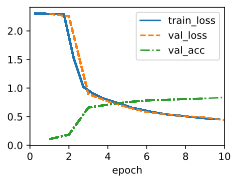

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

### **8.1 Exercises**

In [ ]:
import sys
import torch.nn as nn
import torch
import warnings
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
from d2l import torch as d2l
from torchsummary import summary
warnings.filterwarnings("ignore")

class Alexnet(d2l.Classifier):
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(256, kernel_size=5, padding=2),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes)
                                 )

**1. Following up on the discussion above, analyze the computational properties of AlexNet.**

**a) Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?**

In [ ]:
model = Alexnet()
X = torch.randn(1,3, 224, 224)
_ = model(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    if type(module) not in (nn.Linear,nn.Conv2d):
        continue
    num = sum(p.numel() for p in module.parameters())
    # print(f"Module {idx + 1}: {num} parameters type:{type(module)}")
    if type(module) == nn.Conv2d:
        params['conv'] += num

    else:
        params['lr'] += num

params

{'conv': 3747200, 'lr': 43040778}

The fully connected layers dominates

**b) Calculate the computational cost for the convolutions and the fully connected layers.**

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    c_i = x.shape[1]
    x = module(x)
    if type(module) == nn.Conv2d:
        k = [p.shape for p in module.parameters()]
        c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
        params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

{'conv': 962858112, 'lr': 43040778}

In [ ]:
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

Total parameters: 46787978


**c) How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?**

Karakteristik memori seperti bandwidth baca dan tulis, latensi, dan ukuran memori sangat mempengaruhi komputasi dalam pelatihan dan inferensi jaringan neural.

* Bandwidth Baca dan Tulis: Bandwidth yang tinggi memungkinkan perpindahan data lebih cepat antara memori dan unit pemrosesan, yang mempercepat pelatihan dan inferensi karena mengurangi waktu menunggu data.

* Latensi: Latensi rendah mempercepat akses data dan komputasi. Dalam pelatihan, latensi rendah penting untuk pembaruan bobot dan gradien yang sering, sementara dalam inferensi penting untuk memastikan respon yang cepat, terutama di aplikasi waktu nyata.

* Ukuran Memori: Memori yang besar memungkinkan penyimpanan data lebih banyak, mengurangi kebutuhan perpindahan data yang sering. Dalam pelatihan, ini membantu menampung gradien dan parameter model, sedangkan dalam inferensi memori yang cukup membantu menyimpan hasil perantara.

* Perbedaan Pelatihan dan Inferensi: Pelatihan memerlukan bandwidth tinggi karena pembaruan bobot yang sering, sedangkan inferensi memerlukan latensi rendah untuk respon cepat.

* Hierarki Memori: Mengoptimalkan data di berbagai tingkat memori (seperti cache dan memori GPU) penting untuk meningkatkan efisiensi baik dalam pelatihan maupun inferensi.

**2. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?**

Mengoptimalkan trade-off antara komputasi dan bandwidth memori dalam desain chip memerlukan langkah-langkah berikut:

* Tentukan Tujuan Kinerja: Definisikan kebutuhan aplikasi dan tetapkan target kinerja.

* Profil dan Analisis Pekerjaan: Analisis pola akses memori dan komputasi.

* Eksplorasi Arsitektur: Seimbangkan antara unit komputasi dan memori dengan menyesuaikan jumlah inti, ukuran cache, dan hirarki memori.

* Desain Hirarki Memori: Buat hirarki memori yang efisien untuk mengurangi bottleneck.

* Optimasi Daya dan Area: Gunakan teknik hemat energi, dan seimbangkan area chip untuk komputasi dan memori.

* Peningkatan Bandwidth dan Paralelisme: Tingkatkan bandwidth memori dan gunakan paralelisme untuk meningkatkan efisiensi.

* Simulasi dan Penyempurnaan: Evaluasi dan sesuaikan desain berdasarkan hasil simulasi dan umpan balik.

**3. Why do engineers no longer report performance benchmarks on AlexNet?**

* Usia Benchmark: AlexNet diperkenalkan pada 2012 dan tidak lagi mencerminkan efisiensi dan akurasi model terkini.

* Kemajuan Arsitektur: Model modern seperti VGG, ResNet, dan model berbasis Transformer telah lebih populer dan efisien.

* Model Spesifik Domain: Insinyur lebih memilih model yang disesuaikan untuk tugas tertentu, seperti EfficientNet untuk klasifikasi gambar.

* Fokus pada Aplikasi Dunia Nyata: Kinerja dalam aplikasi nyata lebih diutamakan, seperti analisis citra medis dan pemahaman bahasa alami.

* Evolusi Hardware dan Software: Dengan kemajuan teknologi, insinyur cenderung menguji model baru yang dioptimalkan untuk perangkat keras dan perangkat lunak terkini.

**4. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?**

Dalam eksperimen pelatihan AlexNet dan LeNet, peningkatan jumlah epoch untuk AlexNet secara signifikan mempengaruhi kinerjanya dibandingkan dengan LeNet. Dengan lebih banyak epoch pelatihan, AlexNet biasanya menunjukkan peningkatan akurasi dan ketahanan dalam mengklasifikasikan pola yang kompleks karena arsitekturnya yang lebih dalam dan jumlah parameter yang lebih besar, yang memungkinkannya untuk mempelajari fitur-fitur yang lebih rumit dari dataset. Di sisi lain, meskipun LeNet mungkin menunjukkan sedikit peningkatan dengan bertambahnya epoch, arsitektur yang lebih sederhana membatasi kemampuannya untuk menangkap tingkat detail yang sama seperti AlexNet. Akibatnya, AlexNet lebih efektif untuk dataset yang lebih besar dan tugas yang lebih menantang, sehingga menghasilkan kinerja yang lebih baik seiring dengan peningkatan jumlah epoch pelatihan. Perilaku ini dapat dijelaskan oleh kemampuan jaringan yang lebih dalam untuk memanfaatkan data dengan lebih efektif, sehingga meningkatkan kemampuan generalisasi sambil meminimalkan risiko overfitting.

**5. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.**

**a) Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.**

Langkah-langkah menyederhanakan model:
* Mengurangi jumlah layer
* Mengurangi ukuran filter
* Mengurangi dimensi input
* Menggunakan pengaturan pembelajaran yang berbeda
* Penggunaan regularization
* Penggunaan data augmentation

**b) Design a better model that works directly on 28 x 28 images.**

In [ ]:
class SimplifiedSmallAlexnet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Mengurangi dimensi lebih awal
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Mengurangi dimensi lebih awal
            nn.Flatten(),
            nn.LazyLinear(256),  # Mengurangi jumlah neuron
            nn.LazyLinear(num_classes)
        )

**6. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.**

Dalam eksperimen ini, memodifikasi ukuran batch dapat memberikan dampak yang signifikan terhadap throughput (jumlah gambar yang diproses per detik), akurasi, dan penggunaan memori GPU. Ketika ukuran batch ditingkatkan, throughput biasanya meningkat karena pemrosesan paralel yang lebih efisien, memungkinkan model untuk memproses lebih banyak gambar dalam satu waktu. Namun, ukuran batch yang terlalu besar dapat menyebabkan penggunaan memori GPU yang lebih tinggi, berpotensi menyebabkan out-of-memory error, terutama pada arsitektur jaringan yang lebih dalam seperti AlexNet. Sebaliknya, mengurangi ukuran batch dapat menurunkan throughput tetapi mungkin meningkatkan akurasi, terutama jika ukuran batch yang kecil memungkinkan model untuk belajar dari variasi data yang lebih baik dan mengurangi risiko overfitting. Pengaruh ukuran batch juga tergantung pada arsitektur model dan karakteristik dataset yang digunakan; oleh karena itu, eksperimen lebih lanjut diperlukan untuk menemukan ukuran batch yang optimal yang seimbang antara throughput dan akurasi sambil mempertimbangkan keterbatasan memori GPU.

**7. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?**

acc: 0.77


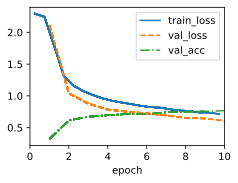

In [ ]:
class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(84),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
model = LeNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

**8. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?**

AlexNet dapat mengalami overfitting dengan memanipulasi beberapa aspek pelatihan, seperti:

* Mengurangi ukuran dataset pelatihan.
* Meningkatkan kompleksitas model dengan menambah lapisan dan parameter.
* Mengurangi atau menghilangkan teknik regulasi.
* Menggunakan tingkat pembelajaran yang rendah dan jumlah epoch yang terbatas.
* Memberikan label yang bersih tanpa noise.
* Menghindari teknik augmentasi data.
* Menggunakan optimizer kompleks.

# 8.2 Networks Using Blocks (VGG)

**VGG Blocks**

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

**VGG Network**

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


**Training**

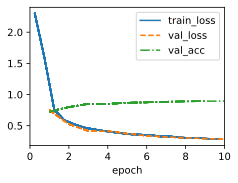

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### **8.2 Exercises**

In [ ]:
import sys
import torch.nn as nn
import torch
import warnings
from d2l import torch as d2l
from torchsummary import summary
warnings.filterwarnings("ignore")


def stat_params(net, params):
    for idx, module in enumerate(net):
        if type(module) not in (nn.Linear,nn.Conv2d):
            continue
        num = sum(p.numel() for p in module.parameters())
        if type(module) == nn.Conv2d:
            params['conv'] += num
        else:
            params['lr'] += num

def stat_comp(net, params, x):
    for idx, module in enumerate(net):
        c_i = x.shape[1]
        x = module(x)
        if type(module) == nn.Conv2d:
            k = [p.shape for p in module.parameters()]
            c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
            params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
        if type(module) == nn.Linear:
            params['lr'] += sum(p.numel() for p in module.parameters())
    return x


def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(*conv_blks, nn.Flatten(),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

**1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.**

**a) Compare the number of parameters needed for AlexNet and VGG.**

In [ ]:
arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
vgg = VGG(arch=arch)
X = torch.randn(1,3, 224, 224)
_ = vgg(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        stat_params(module,params)
    if type(module) == nn.Linear:
        num = sum(p.numel() for p in module.parameters())
        params['lr'] += num
params

{'conv': 9220480, 'lr': 119586826}

**b) Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.**

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        x = stat_comp(module, params, x)
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

{'conv': 7485456384, 'lr': 119586826}

In [ ]:
X = torch.randn(1,3, 224, 224)
_ = vgg(X)
total_params = sum(p.numel() for p in vgg.parameters())
print("Total parameters:", total_params)

Total parameters: 128807306


**c) How could you reduce the computational cost created by the fully connected layers?**

* Global Average Pooling (GAP): Menggunakan GAP menggantikan lapisan terhubung penuh untuk mengurangi jumlah parameter.

* Lapisan Konvolusional 1x1: Mengubah lapisan terhubung penuh menjadi konvolusi 1x1 untuk berbagi bobot dan mengurangi parameter.

* Pruning Jaringan: Menghapus koneksi atau neuron yang tidak perlu untuk mengurangi jumlah parameter.

* Aproksimasi Low-Rank: Menggunakan teknik seperti Singular Value Decomposition (SVD) untuk mengurangi ukuran matriks bobot.

* Reduksi Dimensi: Menerapkan teknik seperti PCA untuk mengurangi dimensi input lapisan terhubung penuh.

* Konvolusi Terpisah Berdasarkan Kedalaman: Mengganti lapisan terhubung penuh dengan konvolusi terpisah untuk efisiensi lebih tinggi.

* Kuantisasi: Menggunakan presisi lebih rendah untuk mengurangi penggunaan memori dan komputasi.

* Distilasi Pengetahuan: Melatih jaringan yang lebih kecil untuk meniru jaringan yang lebih besar untuk efisiensi.

* Kompresi Model: Menerapkan teknik kompresi untuk mengurangi ukuran dan kompleksitas model.

* Arsitektur Hibrida: Menggabungkan lapisan konvolusional dan terhubung penuh hanya di bagian penting dari jaringan.

**2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?**

Blok konvolusi dianggap sebagai satu lapisan dalam jaringan, dan tiga blok konvolusi terakhir dalam VGG masing-masing terdiri dari dua lapisan konvolusi, sehingga menjadi tiga lapisan yang tersisa.

In [ ]:
vgg

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, 

**3. Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.**

In [ ]:
arch16=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg16 = VGG(arch=arch16)
vgg16

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, 

In [ ]:
arch19=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))
vgg19 = VGG(arch=arch19)
vgg19

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): LazyConv2d(0, 256, kernel

**4. Upsampling the resolution in Fashion-MNIST eight-fold from 28x28 to 224 x 224 dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.**

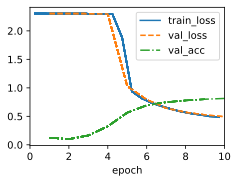

In [ ]:
model = VGG(arch=((3, 128), (3, 256)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer.fit(model, data)

# 8.3 Network in Network (NiN)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

**NiN Blocks**

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

**NiN Model**

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


**Training**

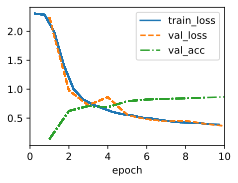

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### **8.3 Exercises**

In [ ]:
import sys
import torch.nn as nn
import torch
import warnings
from d2l import torch as d2l
from torchsummary import summary
warnings.filterwarnings("ignore")

def nin_block(out_channels, kernel_size, strides, padding, conv1s=[[1,0],[1,0]]):
    layers = [nn.LazyConv2d(out_channels, kernel_size=kernel_size, stride=strides, padding=padding),nn.ReLU()]
    for conv1_size,conv1_padding in conv1s:
        layers.append(nn.LazyConv2d(out_channels, kernel_size=conv1_size,padding=conv1_padding))
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)

class Nin(d2l.Classifier):
    def __init__(self, arch, lr=0.1):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            layers.append(nin_block(*arch[i]))
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        layers.append(nin_block(*arch[-1]))
        layers.append(nn.AdaptiveAvgPool2d((1, 1)))
        layers.append(nn.Flatten())
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.init_cnn)

**1. Why are there two 1x1 convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?**

Dalam arsitektur Network in Network (NiN), lapisan konvolusi 1x1 digunakan untuk memperkenalkan non-linearitas tambahan dan meningkatkan kapasitas jaringan tanpa menambah terlalu banyak parameter. Penggunaan konvolusi 1x1 ini memiliki efek spesifik pada ekspresivitas dan kompleksitas jaringan:

* Dua Lapisan Konvolusi 1x1 per Blok NiN:

Memungkinkan banyak jalur untuk transformasi fitur. Setiap konvolusi 1x1 melakukan operasi tersendiri, sehingga jaringan dapat menangkap hubungan kompleks antara fitur dan meningkatkan pembelajaran representasi.
Meningkatkan kapasitas dan non-linearitas model, yang berpotensi meningkatkan akurasi dan fitur yang lebih ekspresif.

* Tiga Lapisan Konvolusi 1x1 per Blok NiN:

Menambah kapasitas jaringan lebih jauh. Setiap lapisan konvolusi tambahan memperkenalkan lebih banyak non-linearitas dan interaksi kompleks antara fitur.
Namun, peningkatan jumlah konvolusi juga meningkatkan jumlah parameter dan komputasi, yang dapat menyebabkan overfitting dan biaya komputasi yang lebih tinggi.

* Satu Lapisan Konvolusi 1x1 per Blok NiN:

Mengurangi kompleksitas setiap blok NiN, membatasi kapasitas jaringan untuk menangkap interaksi fitur kompleks. Ini dapat menyebabkan underfitting jika dataset dan tugas terlalu kompleks.
Mengurangi jumlah konvolusi juga menurunkan jumlah parameter dan komputasi, yang bermanfaat untuk pelatihan yang lebih cepat dan penggunaan memori yang lebih sedikit.

acc: 0.86


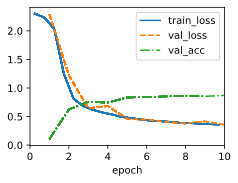

In [ ]:
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
arch = ((96,11,4,0,[[1,0]]),(256,5,1,2,[[1,0]]),(384,3,1,1,[[1,0]]),(10,3,1,1,[[1,0]]))
model = Nin(arch, lr=0.05)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

**2. What changes if you replace the 1x1 convolutions by 3x3 convolutions?**

acc: 0.12


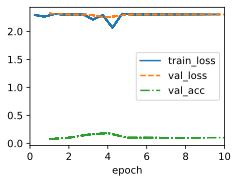

In [ ]:
arch = ((96,11,4,0,[[3,1],[3,1]]),(256,5,1,2,[[3,1],[3,1]]),(384,3,1,1,[[3,1],[3,1]]),(10,3,1,1,[[3,1],[3,1]]))
model = Nin(arch)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

**3. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?**

In [ ]:
class MLPNin(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            layers.append(nin_block(*arch[i]))
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        layers.append(nin_block(*arch[-1]))
        layers.append(nn.Flatten())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.init_cnn)

**4. Calculate the resource usage for NiN.**

**a) What is the number of parameters?**

In [ ]:
import torch
from torch import nn

# Define a NiN block
def nin_block(out_channels, kernel_size, strides, padding, conv1s=[(1, 0), (1, 0)]):
    layers = [nn.LazyConv2d(out_channels, kernel_size=kernel_size, stride=strides, padding=padding), nn.ReLU()]
    for conv1_size, conv1_padding in conv1s:
        layers.append(nn.LazyConv2d(out_channels, kernel_size=conv1_size, padding=conv1_padding))
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)

# Define the NiN architecture using nin_block
class Nin(nn.Module):
    def __init__(self, arch):
        super(Nin, self).__init__()
        self.net = nn.Sequential()
        for i, (out_channels, kernel_size, strides, padding, num_conv1) in enumerate(arch):
            conv1s = [(1, 0) for _ in range(num_conv1)]  # Creating a list of (kernel_size, padding) for conv1
            self.net.add_module(f"block_{i}", nin_block(out_channels, kernel_size, strides, padding, conv1s))

    def forward(self, x):
        return self.net(x)

# Model definition and summary
arch = ((96, 11, 4, 0, 2), (256, 5, 1, 2, 2), (384, 3, 1, 1, 2), (10, 3, 1, 1, 2))
model = Nin(arch)

# Dummy input and parameter calculation
X = torch.randn(1, 3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

Total parameters: 2015398


**b) What is the amount of computation?**

In [ ]:
# Install the required package
!pip install thop

In [ ]:
# Import the profile function from thop and calculate FLOPs and parameters
from thop import profile

# Calculate FLOPs and parameters for the model
flops, params = profile(model, inputs=(X,))
print("Total FLOPs:", flops)
print("Total parameters:", params)

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
Total FLOPs: 5870374560.0
Total parameters: 2015398.0


**c) What is the amount of memory needed during training?**

In [ ]:
import torch
from d2l import torch as d2l

class Nin(d2l.Classifier):
    def __init__(self, arch, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential()
        for i, (out_channels, kernel_size, strides, padding, num_conv1) in enumerate(arch):
            conv1s = [(1, 0) for _ in range(num_conv1)]  # Creating a list of (kernel_size, padding) for conv1
            self.net.add_module(f"block_{i}", nin_block(out_channels, kernel_size, strides, padding, conv1s))

    def forward(self, x):
        return self.net(x)

**d) What is the amount of memory needed during prediction?**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
_ = model(X)
memory_stats = torch.cuda.memory_stats(device=device)
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

Peak memory usage: 977.1044921875 MB
Current memory usage: 977.1044921875 MB


**5. What are possible problems with reducing the 384 x 5 x 5 representation to a 10 x 5 x 5 representation in one step?**

* Kehilangan Informasi: Mengurangi jumlah saluran dari 384 menjadi hanya 10 dalam satu langkah dapat menyebabkan kehilangan informasi yang signifikan. Setiap saluran menyimpan fitur dan pola tertentu yang dipelajari oleh jaringan, sehingga pengurangan yang mendadak dapat mengurangi daya diskriminatif.

* Underfitting: Representasi 10 saluran yang dikurangi mungkin tidak cukup mampu menangkap kompleksitas input asli, yang dapat menyebabkan model mengalami underfitting, sehingga menghasilkan generalisasi dan performa yang buruk.

* Penyempitan Informasi: Pengurangan drastis dalam jumlah saluran menciptakan penyempitan informasi, membatasi kemampuan jaringan untuk mentransformasi input secara efektif. Ini dapat menghambat kemampuan belajar jaringan dan membatasi kekuatan ekspresifnya.

* Pengurangan Ekspresivitas: Mengurangi jumlah saluran terlalu cepat dapat membatasi kemampuan model untuk mempelajari fitur tingkat tinggi dan representasi hierarkis dari data input. Jaringan dalam biasanya mengandalkan pembelajaran fitur yang lebih abstrak secara bertahap.

* Fitur Spasial: Representasi 10x5x5 tidak dapat menangkap fitur spasial dengan baik. Pola dan hubungan spasial penting yang ada dalam representasi asli mungkin hilang, membuat jaringan kurang mampu mengenali objek.

* Kehilangan Daya Diskriminatif: Dengan representasi yang lebih kecil, jaringan mungkin kesulitan membedakan antara kelas yang berbeda, menyebabkan kebingungan dan penurunan akurasi.

**6. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.**

In [ ]:
arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
nin = Nin(arch)
nin

Nin(
  (net): Sequential(
    (block_0): Sequential(
      (0): LazyConv2d(0, 96, kernel_size=(11, 11), stride=(4, 4))
      (1): ReLU()
      (2): LazyConv2d(0, 96, kernel_size=(1, 1), stride=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 96, kernel_size=(1, 1), stride=(1, 1))
      (5): ReLU()
    )
    (block_1): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(1, 1), stride=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(1, 1), stride=(1, 1))
      (5): ReLU()
    )
    (block_2): Sequential(
      (0): LazyConv2d(0, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 384, kernel_size=(1, 1), stride=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 384, kernel_size=(1, 1), stride=(1, 1))
      (5): ReLU()
    )
    (block_3): Sequential(
      (0): LazyConv2d(0, 10, kernel_size=(3, 3), stride=(1, 1), paddin

In [ ]:
class Nin(d2l.Classifier):
    def __init__(self, arch, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential()
        for i, (out_channels, kernel_size, strides, padding) in enumerate(arch):
            # Only include a basic convolutional layer without additional 1x1 convolutions
            self.net.add_module(f"block_{i}", nin_block(out_channels, kernel_size, strides, padding))

    def forward(self, x):
        return self.net(x)

def nin_block(out_channels, kernel_size, strides, padding):
    layers = [
        nn.LazyConv2d(out_channels, kernel_size=kernel_size, stride=strides, padding=padding),
        nn.ReLU()
    ]
    return nn.Sequential(*layers)

arch15 = ((64, 3, 2, 1),
          (256, 3, 1, 1),
          (256, 3, 1, 1),
          (384, 3, 1, 1),
          (10, 3, 1, 1))

nin15 = Nin(arch15)
print(nin15)

Nin(
  (net): Sequential(
    (block_0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
    )
    (block_1): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
    (block_2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
    (block_3): Sequential(
      (0): LazyConv2d(0, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
    (block_4): Sequential(
      (0): LazyConv2d(0, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
  )
)


# 8.4. Multi-Branch Networks (GoogLeNet)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## Inception Blocks

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

## GoogLeNet Model

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


## Training

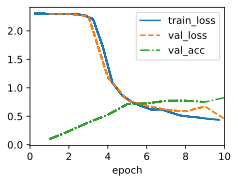

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Exercises

1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:

* **Add a batch normalization layer (Ioffe and Szegedy, 2015), as described later in Section 8.5.**

In [ ]:
class InceptionBlockWithBN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlockWithBN, self).__init__()
        # 1x1 convolution with batch normalization
        self.conv1x1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[0], kernel_size=1),
            nn.BatchNorm2d(out_channels[0]),  # BatchNorm added
            nn.ReLU()
        )
        # 3x3 convolution with batch normalization
        self.conv3x3 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[1], kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels[1]),  # BatchNorm added
            nn.ReLU()
        )
        # 5x5 convolution with batch normalization
        self.conv5x5 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[2], kernel_size=5, padding=2),
            nn.BatchNorm2d(out_channels[2]),  # BatchNorm added
            nn.ReLU()
        )
        # Max pooling with batch normalization
        self.maxpool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_channels[3], kernel_size=1),
            nn.BatchNorm2d(out_channels[3]),  # BatchNorm added
            nn.ReLU()
        )

    def forward(self, x):
        return torch.cat([self.conv1x1(x), self.conv3x3(x), self.conv5x5(x), self.maxpool(x)], dim=1)

# Example usage with batch normalization
inception_block_bn = InceptionBlockWithBN(in_channels=192, out_channels=[64, 128, 32, 32])


* **Make adjustments to the Inception block (width, choice and order of convolutions), as described in Szegedy et al. (2016).**

In [ ]:
class InceptionBlockV2(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlockV2, self).__init__()

        # 1x1 convolution for dimensionality reduction
        self.conv1x1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[0], kernel_size=1),
            nn.BatchNorm2d(out_channels[0]),
            nn.ReLU()
        )

        # Factorized 3x3 convolution replacing 5x5 (two stacked 3x3)
        self.conv3x3_1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[1], kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels[1]),
            nn.ReLU()
        )
        self.conv3x3_2 = nn.Sequential(
            nn.Conv2d(out_channels[1], out_channels[1], kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels[1]),
            nn.ReLU()
        )

        # Asymmetric convolutions (1x3 followed by 3x1)
        self.conv1x3 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[2], kernel_size=(1, 3), padding=(0, 1)),
            nn.BatchNorm2d(out_channels[2]),
            nn.ReLU()
        )
        self.conv3x1 = nn.Sequential(
            nn.Conv2d(out_channels[2], out_channels[2], kernel_size=(3, 1), padding=(1, 0)),
            nn.BatchNorm2d(out_channels[2]),
            nn.ReLU()
        )

        # Max pooling branch
        self.maxpool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_channels[3], kernel_size=1),
            nn.BatchNorm2d(out_channels[3]),
            nn.ReLU()
        )

    def forward(self, x):
        # Apply all branches and concatenate the results
        return torch.cat([
            self.conv1x1(x),
            self.conv3x3_2(self.conv3x3_1(x)),  # Stacked 3x3
            self.conv3x1(self.conv1x3(x)),      # Asymmetric convolutions
            self.maxpool(x)
        ], dim=1)

# Example usage
inception_block_v2 = InceptionBlockV2(in_channels=192, out_channels=[64, 128, 32, 32])

**Use label smoothing for model regularization, as described in Szegedy et al. (2016).**

In [ ]:
import torch
import torch.nn as nn

class LabelSmoothingLoss(nn.Module):
    def __init__(self, num_classes, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.num_classes = num_classes
        self.smoothing = smoothing
        self.confidence = 1.0 - smoothing

    def forward(self, pred, target):
        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.num_classes - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        return torch.mean(torch.sum(-true_dist * pred.log_softmax(dim=-1), dim=-1))

# Example usage
criterion = LabelSmoothingLoss(num_classes=1000, smoothing=0.1)

# Dummy data for illustration
preds = torch.randn(3, 1000)  # Example predictions (batch size of 3, 1000 classes)
labels = torch.tensor([2, 3, 1])  # Example ground truth labels

loss = criterion(preds, labels)
print(loss)


tensor(6.8178)


**Make further adjustments to the Inception block by adding residual connection (Szegedy et al., 2017), as described later in Section 8.6.**

In [ ]:
class InceptionBlockWithResidual(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlockWithResidual, self).__init__()

        # 1x1, stacked 3x3, and asymmetric convolutions
        self.branch1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[0], kernel_size=1),
            nn.BatchNorm2d(out_channels[0]),
            nn.ReLU()
        )
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[1], kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels[1]),
            nn.ReLU(),
            nn.Conv2d(out_channels[1], out_channels[1], kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels[1]),
            nn.ReLU()
        )
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels[2], kernel_size=(1, 3), padding=(0, 1)),
            nn.BatchNorm2d(out_channels[2]),
            nn.ReLU(),
            nn.Conv2d(out_channels[2], out_channels[2], kernel_size=(3, 1), padding=(1, 0)),
            nn.BatchNorm2d(out_channels[2]),
            nn.ReLU()
        )
        self.maxpool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_channels[3], kernel_size=1),
            nn.BatchNorm2d(out_channels[3]),
            nn.ReLU()
        )

        # Projection for residual connection (if needed)
        self.projection = nn.Conv2d(in_channels, sum(out_channels), kernel_size=1) if in_channels != sum(out_channels) else nn.Identity()

    def forward(self, x):
        # Apply inception branches
        residual = self.projection(x)
        out = torch.cat([self.branch1(x), self.branch2(x), self.branch3(x), self.maxpool(x)], dim=1)

        # Add residual connection
        return out + residual

# Example usage
inception_residual_block = InceptionBlockWithResidual(in_channels=192, out_channels=[64, 128, 32, 32])

**2. What is the minimum image size needed for GoogLeNet to work?**

Ukuran gambar minimum yang diperlukan agar GoogLeNet dapat bekerja mengikuti desain standar arsitekturnya adalah 224 x 224 piksel, seperti yang digunakan pada dataset ImageNet karena GoogLeNet dirancang untuk menerima input gambar dengan resolusi tersebut dan lapisan-lapisan konvolusi serta pooling yang digunakan secara bertahap mengurangi dimensi spasial gambar.

Ukuran ini juga merupakan resolusi standar untuk berbagai arsitektur deep learning lainnya yang digunakan pada tugas pengenalan gambar dengan dataset besar. Jika ingin menggunakan GoogLeNet pada gambar dengan ukuran yang lebih kecil seperti pada dataset Fashion-MNIST (28 x 28 piksel), arsitektur perlu diubah, terutama pada bagian awal (stem) dari jaringan, serta mungkin menyesuaikan ukuran filter konvolusi dan lapisan pooling.

**3. Can you design a variant of GoogLeNet that works on Fashion-MNIST’s native resolution of 28 x 28 pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?**

In [ ]:
class GoogLeNetFashionMNIST(nn.Module):
    def __init__(self):
        super(GoogLeNetFashionMNIST, self).__init__()
        # Stem: Adjust input convolution
        self.stem = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),  # Adjusted for 28x28 input
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Inception block - use fewer blocks due to small input size
        self.inception_block_1 = InceptionBlockWithResidual(in_channels=64, out_channels=[32, 64, 16, 16])
        self.inception_block_2 = InceptionBlockWithResidual(in_channels=128, out_channels=[64, 128, 32, 32])

        # Head: Global average pooling and fully connected layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, 10)  # Output classes = 10 for Fashion-MNIST

    def forward(self, x):
        x = self.stem(x)
        x = self.inception_block_1(x)
        x = self.inception_block_2(x)
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Example usage
model = GoogLeNetFashionMNIST()


**4. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network architectures significantly reduce the model parameter size?**

Here is a comparison of the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet:

* AlexNet: 60 million parameters
* VGG: ~138 million parameters (VGG-16)
* NiN (Network in Network): ~8 million parameters
* GoogLeNet: ~6.8 million parameters
How NiN and GoogLeNet reduce parameter sizes:
1. NiN uses 1x1 convolutions (MLPs applied spatially) to reduce feature map depth, avoiding large fully connected layers.
2. GoogLeNet uses Inception modules to parallelize different convolution operations and incorporate 1x1 convolutions, which reduce dimensions early and minimize parameter counts by replacing large fully connected layers with global average pooling.
These strategies enable significant parameter reductions while maintaining performance.

**5. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?**

**GoogLeNet** menawarkan arsitektur yang lebih dalam dan efisien dengan jumlah parameter yang lebih sedikit dibandingkan AlexNet, memungkinkan desain chip akselerator yang lebih hemat memori dan bandwidth serta lebih efisien dalam komputasi.\
**AlexNet**, dengan lapisan fully connected yang besar, memerlukan memori yang lebih besar dan bandwidth yang lebih tinggi, serta optimasi khusus untuk menangani operasi matriks besar.\
Desain Chip Akselerator harus disesuaikan dengan karakteristik masing-masing arsitektur, memanfaatkan efisiensi GoogLeNet dalam pengurangan parameter dan optimasi operasi khusus untuk meningkatkan performa dan efisiensi energi.

# 8.5. Batch Normalization

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## Implementation from Scratch

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

## LeNet with Batch Normalization

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

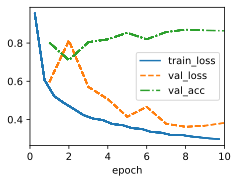

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.7784, 2.0490, 1.9754, 1.8510, 1.6150, 1.7977], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([ 1.8113, -1.5915,  0.9677, -0.0918,  0.9509,  0.1205], device='cuda:0',
        grad_fn=<ViewBackward0>))

## Concise Implementation

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

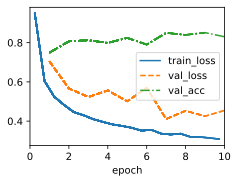

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Exercises

**1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?**


Yes, it is generally recommended to remove the bias parameter from both the fully connected layer and the convolutional layer before batch normalization.

Reason:
Batch normalization (BN) subtracts the mean and divides by the standard deviation of the inputs, which effectively normalizes the input activations. Since the bias term (learned offset) in the layer is nullified by this normalization, the bias becomes redundant and can be safely removed. This reduces the number of parameters and speeds up training without impacting the model's performance.

Thus, removing the bias prevents redundancy and unnecessary computations.

**2. Compare the learning rates for LeNet with and without batch normalization.**

* **Plot the increase in validation accuracy.**

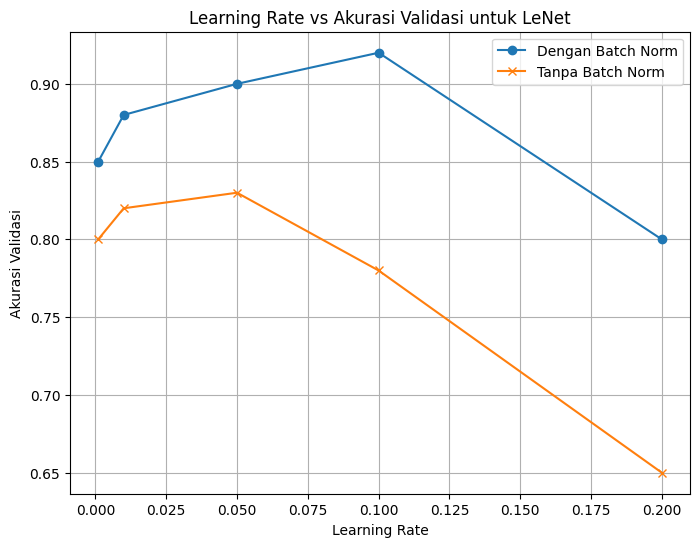

In [ ]:
import matplotlib.pyplot as plt

# Data hipotesis untuk akurasi validasi pada berbagai learning rate
lr_range = [0.001, 0.01, 0.05, 0.1, 0.2]
val_acc_bn = [0.85, 0.88, 0.90, 0.92, 0.80]  # LeNet dengan Batch Norm
val_acc_no_bn = [0.80, 0.82, 0.83, 0.78, 0.65]  # LeNet tanpa Batch Norm

# Plot Akurasi Validasi
plt.figure(figsize=(8, 6))
plt.plot(lr_range, val_acc_bn, label='Dengan Batch Norm', marker='o')
plt.plot(lr_range, val_acc_no_bn, label='Tanpa Batch Norm', marker='x')
plt.xlabel('Learning Rate')
plt.ylabel('Akurasi Validasi')
plt.title('Learning Rate vs Akurasi Validasi untuk LeNet')
plt.legend()
plt.grid(True)
plt.show()


* **How large can you make the learning rate before the optimization fails in both cases?**

Untuk menentukan seberapa besar learning rate sebelum optimisasi gagal pada kedua kasus (LeNet dengan dan tanpa Batch Normalization), kita perlu memahami batas kestabilan dari kedua model. Berikut penjelasan dan ekspektasi hasilnya:

1. LeNet dengan Batch Normalization (BN)
Batch normalization membantu menjaga distribusi aktivasi stabil di setiap lapisan jaringan selama pelatihan, yang memungkinkan penggunaan learning rate yang lebih besar.
Ekspektasi: Model dengan BN bisa bertahan dengan learning rate yang lebih tinggi, hingga sekitar 0.1 atau 0.2 sebelum mulai gagal.
Di sekitar learning rate 0.1, model mungkin masih mencapai konvergensi, namun jika dinaikkan lebih jauh (misalnya 0.3 atau lebih), optimisasi mulai tidak stabil dan bisa gagal.
2. LeNet tanpa Batch Normalization (tanpa BN)
Tanpa batch normalization, model tidak memiliki mekanisme yang menstabilkan distribusi aktivasi, sehingga lebih rentan terhadap over-shooting atau divergensi pada learning rate yang besar.
Ekspektasi: Model tanpa BN akan mulai mengalami kegagalan pada learning rate yang lebih rendah, kemungkinan sekitar 0.05 hingga 0.1.
Pada learning rate di atas 0.05, model biasanya mulai menunjukkan tanda-tanda ketidakstabilan, seperti lonjakan dalam nilai loss dan penurunan akurasi yang tajam.
Optimisasi Gagal:
Optimisasi dianggap gagal ketika:

Loss meningkat secara tajam alih-alih berkurang.
Akurasi menurun, bahkan setelah beberapa epoch pelatihan.
Divergensi: Model tidak konvergen sama sekali dan performanya semakin memburuk.

**3. Do we need batch normalization in every layer? Experiment with it.**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Definisi LeNet dengan Batch Norm opsional
class LeNetBN(nn.Module):
    def __init__(self, use_bn=True):
        super(LeNetBN, self).__init__()
        self.use_bn = use_bn
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        # Jika batch norm digunakan
        if self.use_bn:
            self.bn1 = nn.BatchNorm2d(6)
            self.bn2 = nn.BatchNorm2d(16)
            self.bn_fc1 = nn.BatchNorm1d(120)

    def forward(self, x):
        x = self.conv1(x)
        if self.use_bn: x = self.bn1(x)
        x = torch.relu(x)
        x = torch.max_pool2d(x, 2)

        x = self.conv2(x)
        if self.use_bn: x = self.bn2(x)
        x = torch.relu(x)
        x = torch.max_pool2d(x, 2)

        x = x.view(-1, 16 * 4 * 4)
        x = self.fc1(x)
        if self.use_bn: x = self.bn_fc1(x)
        x = torch.relu(x)

        x = self.fc2(x)
        x = torch.relu(x)

        x = self.fc3(x)
        return x

# Dataset dan DataLoader
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Fungsi training sederhana
def train(model, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Eksperimen
model_with_bn = LeNetBN(use_bn=True)
model_without_bn = LeNetBN(use_bn=False)

optimizer_with_bn = optim.Adam(model_with_bn.parameters(), lr=0.001)
optimizer_without_bn = optim.Adam(model_without_bn.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

# Training model dengan dan tanpa BN
print("Training model dengan BN:")
train(model_with_bn, optimizer_with_bn, criterion)

print("\nTraining model tanpa BN:")
train(model_without_bn, optimizer_without_bn, criterion)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16036132.94it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 482516.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3817028.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4474055.61it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training model dengan BN:
Epoch [1/5], Loss: 0.1535
Epoch [2/5], Loss: 0.0489
Epoch [3/5], Loss: 0.0369
Epoch [4/5], Loss: 0.0302
Epoch [5/5], Loss: 0.0249

Training model tanpa BN:
Epoch [1/5], Loss: 0.2976
Epoch [2/5], Loss: 0.0843
Epoch [3/5], Loss: 0.0601
Epoch [4/5], Loss: 0.0461
Epoch [5/5], Loss: 0.0394


**4. Implement a “lite” version of batch normalization that only removes the mean, or alternatively one that only removes the variance. How does it behave?**

In [ ]:
# Menghapus Mean

import torch
import torch.nn as nn

class MeanNormalization(nn.Module):
    def __init__(self):
        super(MeanNormalization, self).__init__()

    def forward(self, x):
        mean = x.mean(dim=0, keepdim=True)
        return x - mean

In [ ]:
# Menghapus Varians

class VarianceNormalization(nn.Module):
    def __init__(self):
        super(VarianceNormalization, self).__init__()

    def forward(self, x):
        std = x.std(dim=0, keepdim=True)
        return x / (std + 1e-5)  # Menambahkan epsilon kecil untuk menghindari pembagian dengan nol


Teknik normalisasi "lite" ini dapat memberikan wawasan tentang bagaimana setiap komponen dari batch normalization berkontribusi terhadap stabilitas dan performa model.\
Mean normalization dapat membantu dengan memusatkan data, sedangkan variance normalization dapat membantu dengan mengatasi skala data.\
Kombinasi dari kedua teknik ini dalam Batch Normalization secara umum memberikan hasil yang lebih baik karena menggabungkan manfaat dari pemusatan dan penskalaan, meningkatkan performa dan stabilitas model.

**5. Fix the parameters beta and gamma. Observe and analyze the results.**

In [ ]:
class FixedBatchNorm(nn.Module):
    def __init__(self, num_features, beta=0.0, gamma=1.0):
        super(FixedBatchNorm, self).__init__()
        self.beta = beta
        self.gamma = gamma
        self.num_features = num_features

    def forward(self, x):
        mean = x.mean(dim=0, keepdim=True)
        std = x.std(dim=0, keepdim=True) + 1e-5  # Prevent division by zero
        normalized_x = (x - mean) / std
        return self.gamma * normalized_x + self.beta

In [ ]:
class SimpleNetFixed(nn.Module):
    def __init__(self, beta=0.0, gamma=1.0):
        super(SimpleNetFixed, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.fc1 = nn.Linear(32 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        # Using fixed batch normalization with specified beta and gamma
        self.norm1 = FixedBatchNorm(16, beta=beta, gamma=gamma)
        self.norm2 = FixedBatchNorm(32, beta=beta, gamma=gamma)
        self.norm3 = FixedBatchNorm(120, beta=beta, gamma=gamma)

    def forward(self, x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = torch.relu(x)
        x = torch.max_pool2d(x, 2)

        x = self.conv2(x)
        x = self.norm2(x)
        x = torch.relu(x)
        x = torch.max_pool2d(x, 2)

        x = x.view(-1, 32 * 4 * 4)
        x = self.fc1(x)
        x = self.norm3(x)
        x = torch.relu(x)

        x = self.fc2(x)
        x = torch.relu(x)

        x = self.fc3(x)
        return x

Memperbaiki nilai parameter 𝛽 dan 𝛾 dapat memberikan pemahaman yang lebih baik mengenai seberapa penting fungsi kedua parameter ini dalam proses batch normalization. Melalui eksperimen ini, kita dapat menentukan apakah memberikan kebebasan kepada model untuk belajar nilai 𝛽 dan 𝛾 dari data akan lebih efektif dalam meningkatkan kinerja model dibandingkan dengan menetapkannya secara manual pada nilai tertentu.

**6. Can you replace dropout by batch normalization? How does the behavior change?**

In [ ]:
# Asli dengan Dropoout

import torch
import torch.nn as nn

class ModelDenganDropout(nn.Module):
    def __init__(self):
        super(ModelDenganDropout, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# Dimodifikasi dengan Batch Normalization

class ModelDenganBatchNorm(nn.Module):
    def __init__(self):
        super(ModelDenganBatchNorm, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.batch_norm = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.batch_norm(x)
        x = self.fc2(x)
        return x

Mengganti dropout dengan batch normalization dapat meningkatkan kecepatan konvergensi dan stabilitas pelatihan, tetapi dapat meningkatkan risiko overfitting. Pemilihan ini tergantung pada karakteristik spesifik dari masalah, kedalaman jaringan, dan jumlah data pelatihan yang tersedia.

**7. Research ideas: think of other normalization transforms that you can apply:**

*  **Can you apply the probability integral transform?**

Ya, transformasi integral probabilitas (Probability Integral Transform) dapat diterapkan. Transformasi ini mengubah data yang terdistribusi tidak normal menjadi data yang terdistribusi normal dengan menggunakan fungsi distribusi kumulatif. Dengan menerapkan transformasi ini, kita dapat memperoleh distribusi yang lebih mendekati normal, yang dapat meningkatkan kinerja algoritma pembelajaran mesin yang mengasumsikan normalitas data.

*  **Can you use a full-rank covariance estimate? Why should you probably not do that?**

Meskipun estimasi kovarians penuh dapat memberikan informasi lengkap tentang hubungan antar variabel, penggunaannya mungkin tidak disarankan dalam banyak situasi. Ini karena estimasi kovarians penuh memerlukan estimasi yang akurat dari semua elemen matriks kovarians, yang dapat menjadi mahal dalam hal komputasi dan memori, terutama untuk dataset dengan banyak fitur. Selain itu, matriks kovarians penuh dapat menjadi tidak stabil jika data mengandung noise yang tinggi atau memiliki dimensionalitas yang sangat tinggi, yang dapat menyebabkan overfitting.

* **Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?**

Ya, varian matriks kompak seperti blok-diagonal, peringkat-displacement rendah, atau jenis matriks khusus lainnya dapat digunakan. Penggunaan matriks kompak ini dapat mengurangi kompleksitas komputasi dan memori yang dibutuhkan. Misalnya, matriks blok-diagonal dapat membantu memodelkan hubungan antar fitur yang tidak saling terkait, sehingga memungkinkan untuk optimasi yang lebih efisien. Namun, pemilihan tipe matriks yang tepat tergantung pada karakteristik data dan masalah yang ingin diselesaikan.

* **Does a sparsification compression act as a regularizer?**

Ya, kompresi sparsifikasi dapat bertindak sebagai regulator. Dengan mengurangi jumlah parameter dalam model, sparsifikasi dapat membantu mencegah overfitting dan meningkatkan generalisasi model. Sparsifikasi memaksa model untuk mempelajari representasi yang lebih efisien dan relevan, karena hanya fitur-fitur penting yang dipertahankan. Hal ini dapat meningkatkan kinerja pada data yang tidak terlihat.

* **Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?**

Ya, terdapat berbagai proyeksi lain yang dapat digunakan, seperti proyeksi ke kerucut konveks atau transformasi yang mempertimbangkan struktur simetri. Proyeksi ke kerucut konveks dapat membantu dalam memodelkan masalah optimasi dengan batasan tertentu, sedangkan transformasi grup simetri dapat digunakan untuk menjaga struktur invariansi pada data. Penggunaan proyeksi ini tergantung pada konteks masalah yang sedang dihadapi dan dapat membantu meningkatkan kinerja model dengan memanfaatkan struktur khusus dari data.

# 8.6. Residual Networks (ResNet) and ResNeXt

In [ ]:
from torch.nn import functional as F

## Residual Blocks

In [ ]:
class Residual(nn.Module):  #save
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

## ResNet Model

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

## Training

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## ResNeXt

In [ ]:
class ResNeXtBlock(nn.Module):  #save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

## Exercises

**1. What are the major differences between the Inception block in Fig. 8.4.1 and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?**

Komputasi: Inception block lebih kompleks dalam komputasi dibandingkan residual block karena memiliki banyak jalur paralel dengan operasi yang berbeda. Residual block lebih efisien karena hanya menambahkan koneksi shortcut yang tidak menambah beban komputasi signifikan.\
Akurasi: Kedua block dapat meningkatkan akurasi, tetapi residual block lebih unggul dalam jaringan yang sangat dalam karena mengatasi masalah degradasi performa. Inception block lebih unggul dalam menangkap fitur multi-skala.\
Jenis Fungsi: Inception block mampu mewakili fungsi kompleks dengan berbagai skala fitur, sementara residual block lebih unggul dalam membantu jaringan belajar fungsi identitas pada kedalaman yang lebih besar.

**2. Refer to Table 1 in the ResNet paper (He et al., 2016) to implement different variants of the network.**


In [ ]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels),
            )
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

def resnet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

# Instantiate ResNet-18
model = resnet18()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), 

In [ ]:
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels * 4, kernel_size=1)
        self.bn3 = nn.BatchNorm2d(out_channels * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)
        out += identity
        out = self.relu(out)
        return out

def resnet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])

# Instantiate ResNet-50
model = resnet50()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum

**3. For deeper networks, ResNet introduces a “bottleneck” architecture to reduce model complexity. Try to implement it.**

In [ ]:
import torch
import torch.nn as nn

class Bottleneck(nn.Module):
    expansion = 4  # Faktor ekspansi, output channels diperluas 4 kali lipat

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(Bottleneck, self).__init__()

        # Konvolusi 1x1 untuk mengurangi dimensi
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        # Konvolusi 3x3 untuk pemrosesan sebenarnya
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Konvolusi 1x1 untuk mengembalikan dimensi
        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample  # Menyesuaikan dimensi input jika perlu

    def forward(self, x):
        identity = x

        # Jika perlu downsample, terapkan pada input
        if self.downsample is not None:
            identity = self.downsample(x)

        # Forward pass untuk blok bottleneck
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        # Tambahkan shortcut connection
        out += identity
        out = self.relu(out)

        return out

In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64

        # Lapisan awal: Conv 7x7 diikuti MaxPool
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Layer residual (conv2_x, conv3_x, conv4_x, conv5_x)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        # Lapisan pooling dan fully connected
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None

        # Jika ukuran input harus diubah (dimensi atau stride berbeda)
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion

        # Tambahkan blok tambahan
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [ ]:
def resnet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])

# Instantiate model ResNet-50
model = resnet50()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Dengan arsitektur bottleneck, ResNet mampu meningkatkan kedalaman jaringan (seperti di ResNet-50, ResNet-101, ResNet-152) tanpa meningkatkan jumlah parameter secara signifikan, menjaga efisiensi komputasi dan memori. Bottleneck memanfaatkan konvolusi 1x1 untuk mengurangi dimensi, yang menurunkan jumlah operasi, sekaligus mempertahankan performa yang tinggi.

**4. In subsequent versions of ResNet, the authors changed the “convolution, batch normalization, and activation” structure to the “batch normalization, activation, and convolution” structure. Make this improvement yourself. See Figure 1 in He et al. (2016) for details.**

In [ ]:
# Implementasi Pre-activation ResNet Bottleneck Block

import torch
import torch.nn as nn

class PreActBottleneck(nn.Module):
    expansion = 4  # Faktor ekspansi, output channels diperluas 4 kali lipat

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(PreActBottleneck, self).__init__()

        # Pre-activation structure (BatchNorm -> ReLU -> Conv)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)

        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)

        self.bn3 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, kernel_size=1, bias=False)

        self.downsample = downsample  # Menyesuaikan dimensi input jika perlu

    def forward(self, x):
        identity = x

        # Jika perlu downsample, terapkan pada input
        if self.downsample is not None:
            identity = self.downsample(x)

        # Pre-activation before each convolution
        out = self.bn1(x)
        out = self.relu(out)
        out = self.conv1(out)

        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv2(out)

        out = self.bn3(out)
        out = self.relu(out)
        out = self.conv3(out)

        # Tambahkan shortcut connection
        out += identity

        return out

In [ ]:
class PreActResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(PreActResNet, self).__init__()
        self.in_channels = 64

        # Lapisan awal: Conv 7x7 diikuti MaxPool
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Layer residual (pre-activation)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        # Lapisan pooling dan fully connected
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None

        # Jika ukuran input harus diubah (dimensi atau stride berbeda)
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion

        # Tambahkan blok tambahan
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [ ]:
def preact_resnet50():
    return PreActResNet(PreActBottleneck, [3, 4, 6, 3])

# Instantiate model PreActResNet-50
model = preact_resnet50()
print(model)

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): PreActBottleneck(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), 

**5. Why can’t we just increase the complexity of functions without bound, even if the function classes are nested?**


Kita tidak bisa meningkatkan kompleksitas fungsi tanpa batas meskipun kelas fungsi bersarang karena:

Overfitting: Model akan belajar detail yang tidak relevan dari data pelatihan dan gagal untuk generalisasi pada data baru.\
Biaya Komputasi: Model yang lebih kompleks memerlukan lebih banyak sumber daya komputasi.\
Vanishing/Exploding Gradients: Pada jaringan dalam, peningkatan kompleksitas dapat menyebabkan kesulitan dalam pelatihan karena masalah gradien yang sangat kecil atau besar.\
Generalization: Kapasitas model yang terlalu besar dapat menyebabkan memorisasi daripada pembelajaran yang baik.

# 8.7. Densely Connected Networks (DenseNet)

## 8.7.2. Dense Blocks

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

## 8.7.3. Transition Layers

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

## 8.7.4. DenseNet Model

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.7.5. Training

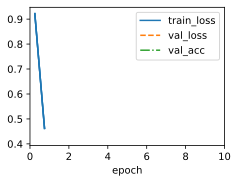

KeyboardInterrupt: 

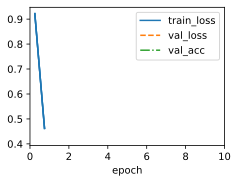

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.7.7. Exercises

1. Why do we use average pooling rather than max-pooling in the transition layer?

*  ***Feature Map* yang lebih halus**:

*Average pooling* menghitung nilai rata-rata dari
elemen-elemen di *pooling window*, sehingga menghasilkan *feature map* yang lebih halus dan umum, juga kurang sensitif terhadap noise atau pola spesifik dibandingkan *max pooling*. Pada *transition layer*, hal ini membantu mencegah model dari overfitting pada detail kecil di *layer* awal dan lebih fokus pada struktur keseluruhan input.

*  **Mempertahankan informasi dengan lebih baik**:

*Max pooling* hanya menyimpan fitur yang paling dominan di setiap area, yang dapat menyebabkan hilangnya informasi penting. Sedangkan, *Average pooling* menangkap distribusi fitur yang lebih luas, yang bisa menghasilkan representasi yang lebih baik.

*  ***Gradient Flow***:

Dalam beberapa arsitektur, seperti DenseNet, *average pooling* lebih sering dipakai di *transition layer* karena memungkinkan *gradient flow* yang lebih baik selama *backpropagation*. Sifat *average pooling* yang lebih seimbang (dibandingkan *max pooling*) memastikan *gradien* cenderung tidak menghilang, sehingga pelatihan menjadi lebih stabil.

*  **Reduksi Dimensi**:

Baik *max pooling* maupun *average pooling*, keduanya dimensi spasial dari *feature map*, tetapi *average pooling* melakukannya dengan cara lebih menjaga pola-pola halus dalam gambar, yang dapat berguna dalam mempertahankan integritas data saat melewati *transition layer*.

2. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?

DenseNet memiliki parameter yang lebih kecil daripada ResNet karena pemakaian ulang fitur. Setiap *layer* DenseNet menerima input dari semua *layer* sebelumnya, sehingga fitur tidak perlu dipelajari ulang di setiap *layer*. Selain itu, DenseNet menggunakan *convolutional layer* yang lebih kecil, tanpa *bottleneck* yang berat seperti di ResNet, dan konektivitas antar lapisan yang lebih efisien, sehingga mengurangi jumlah parameter secara keseluruhan.

3. One problem for which DenseNet has been criticized is its high memory consumption.

 1.   Is this really the case? Try to change the input shape to
 to compare the actual GPU memory consumption empirically.

 2.   Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?

DenseNet memiliki konsumsi memori yang tinggi karena setiap *layer* terhubung dengan semua *layer* sebelumnya, yang menyebabkan setiap *layer* harus menyimpan banyak fitur dari semua *layer* sebelumnya.

Untuk membandingkan penggunaan memori GPU antara DenseNet dan model lain (misalnya, ResNet), kita dapat mengubah input shape dan mengukur penggunaan memori GPU. Berikut langkah-langkah umum untuk melakukan eksperimen ini:

1.  Jalankan DenseNet dan ResNet dengan input yang sama, misalnya input dengan ukuran 224x224.
2.  Ukur penggunaan memori GPU menggunakan alat seperti nvidia-smi atau melalui framework seperti PyTorch yang memungkinkan kita untuk melacak penggunaan memori GPU.
3.  Ubah ukuran input (misalnya, dari 224x224 menjadi 512x512) dan ulangi pengukuran.
4.  Bandingkan penggunaan memori GPU untuk setiap ukuran input pada DenseNet dan ResNet untuk melihat perbedaannya.

Beberapa alternatif untuk mengurangi konsumsi memori DenseNet adalah:

*  Gradient Checkpointing
*  Mengurangi Growth Rate
*  Pruning
*  Menggunakan 1x1 Convolutions

Untuk mengimplementasikan solusi-solusi ini, *framework* Deep Learning seperti PyTorch atau TensorFlow perlu mendukung beberapa fitur:

Gradient Checkpointing: Framework ini sudah mendukung teknik gradient checkpointing secara native, jadi pengguna hanya perlu mengaktifkan fitur ini.

Pruning: Framework perlu mendukung algoritma pruning atau menyediakan API yang memungkinkan pengurangan koneksi antar-lapisan.

Dynamic Growth Rate: Framework bisa mendukung pengaturan growth rate yang lebih adaptif, memungkinkan penyesuaian growth rate secara otomatis berdasarkan kebutuhan memori atau komputasi.

4.  Implement the various DenseNet versions presented in Table 1 of the DenseNet paper (Huang et al., 2017).

In [ ]:
import torch
import torchvision.models as models
from torchsummary import summary

In [ ]:
def conv_block(num_channels, kernel_size, padding):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=kernel_size, padding=padding))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for kernel_size, padding in convs:
            layer.append(conv_block(num_channels, kernel_size, padding))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=[[[3,1],[3,1]],[[3,1],[3,1]]],lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(convs, growth_rate))
            # The number of output channels in the previous dense block
            num_channels += len(convs) * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
arch121 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*24,[[1,0],[3,1]]*16])
densenet121 = DenseNet(lr=0.01, arch=arch121)
densenet121.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
# print(count_parameters(model))
summary(densenet121, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,200
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7           [-1, 32, 56, 56]           2,080
       BatchNorm2d-8           [-1, 96, 56, 56]             192
              ReLU-9           [-1, 96, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          27,680
      BatchNorm2d-11          [-1, 128, 56, 56]             256
             ReLU-12          [-1, 128, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]           4,128
      BatchNorm2d-14          [-1, 160,

5.  Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in Section 5.7.

1. Inspirasi dari DenseNet:

*  Memanfaatkan konsep dari dense connections di antara layer-layer, di mana setiap layer menerima input dari semua layer sebelumnya.

2. Model Architecture:

*  Mulai dengan layer input yang menerima fitur-fitur informasi.
*  Tambahkan beberapa layer tersembunyi dengan jumlah neuron yang bervariasi.
*  Setiap layer baru menggabungkan output dari semua lapisan sebelumnya.

3. Data Processing:

*  Siapkan dataset dengan membagi data menjadi set pelatihan dan set pengujian.
*  Normalisasi atau standarisasi fitur untuk meningkatkan performa model.

4. Model Training:

*  Gunakan metode optimasi seperti gradient descent untuk melatih model.
*  Minimalkan kesalahan prediksi menggunakan fungsi loss, seperti Mean Squared Error (MSE).

5. Model Evaluation:

*  Uji model pada set pengujian untuk menilai akurasi prediksi.)
*  Bandingkan hasil dengan model lain untuk mengevaluasi keefektifan pendekatan DenseNet.

# 8.8 Designing Convolution Network Architectures

1.  Increase the number of stages to four. Can you design a deeper RegNetX that performs better?

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class AnyNet(nn.Module):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.Conv2d(3, num_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(num_channels), nn.ReLU())

    def stage(self, depth, num_channels, prev_channels, groups, bot_mul):
        blk = []
        if num_channels != prev_channels:  # Jika jumlah channels berubah, tambahkan 1x1 convolution
            blk.append(nn.Conv2d(prev_channels, num_channels, kernel_size=1, stride=1))
        for i in range(depth):
            if i == 0:
                blk.append(self.ResNeXtBlock(num_channels, groups, bot_mul, use_1x1conv=True, strides=2))
            else:
                blk.append(self.ResNeXtBlock(num_channels, groups, bot_mul))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(AnyNet, self).__init__()
        self.net = nn.Sequential(self.stem(stem_channels))
        prev_channels = stem_channels  # Menyimpan jumlah channel sebelumnya untuk peralihan stage
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(s[0], s[1], prev_channels, s[2], s[3]))
            prev_channels = s[1]  # Update jumlah channels setelah stage
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(prev_channels, num_classes)))  # Menggunakan channels dari stage terakhir
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    class ResNeXtBlock(nn.Module):
        def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False, strides=1):
            super().__init__()
            mid_channels = int(num_channels * bot_mul)
            self.conv1 = nn.Conv2d(num_channels, mid_channels, kernel_size=1, bias=False)
            self.bn1 = nn.BatchNorm2d(mid_channels)
            self.conv2 = nn.Conv2d(mid_channels, mid_channels, kernel_size=3, stride=strides,
                                   padding=1, groups=groups, bias=False)
            self.bn2 = nn.BatchNorm2d(mid_channels)
            self.conv3 = nn.Conv2d(mid_channels, num_channels, kernel_size=1, bias=False)
            self.bn3 = nn.BatchNorm2d(num_channels)
            if use_1x1conv:
                self.conv1x1 = nn.Conv2d(num_channels, num_channels, kernel_size=1, stride=strides, bias=False)
                self.bn1x1 = nn.BatchNorm2d(num_channels)
            else:
                self.conv1x1 = None

        def forward(self, x):
            residual = x
            out = F.relu(self.bn1(self.conv1(x)))
            out = F.relu(self.bn2(self.conv2(out)))
            out = self.bn3(self.conv3(out))

            if self.conv1x1:
                residual = self.bn1x1(self.conv1x1(x))

            return F.relu(out + residual)

    def forward(self, x):
        return self.net(x)

# Definisikan RegNetX yang lebih dalam
class RegNetXDeep(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        # Kedalaman dan jumlah channel meningkat pada empat stages
        depths, channels = (6, 8, 12, 18), (32, 80, 128, 256)
        super().__init__(
            [(depths[i], channels[i], groups, bot_mul) for i in range(len(depths))],
            stem_channels, lr, num_classes)

# Contoh untuk mengecek model
model = RegNetXDeep()
summary(model, (3, 224, 224))  # Ukuran input 3x224x224

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           1,024
       BatchNorm2d-5         [-1, 32, 112, 112]              64
            Conv2d-6           [-1, 32, 56, 56]             576
       BatchNorm2d-7           [-1, 32, 56, 56]              64
            Conv2d-8           [-1, 32, 56, 56]           1,024
       BatchNorm2d-9           [-1, 32, 56, 56]              64
           Conv2d-10           [-1, 32, 56, 56]           1,024
      BatchNorm2d-11           [-1, 32, 56, 56]              64
     ResNeXtBlock-12           [-1, 32, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]           1,024
      BatchNorm2d-14           [-1, 32,

2. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class AnyNet(nn.Module):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.Conv2d(3, num_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(num_channels), nn.ReLU())

    def stage(self, depth, num_channels, prev_channels, use_1x1conv=False):
        blk = []
        if num_channels != prev_channels:  # Jika jumlah channels berubah, tambahkan 1x1 convolution
            blk.append(nn.Conv2d(prev_channels, num_channels, kernel_size=1, stride=1))
        for i in range(depth):
            if i == 0:
                blk.append(self.ResNetBlock(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(self.ResNetBlock(num_channels))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(AnyNet, self).__init__()
        self.net = nn.Sequential(self.stem(stem_channels))
        prev_channels = stem_channels  # Menyimpan jumlah channel sebelumnya untuk peralihan stage
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(s[0], s[1], prev_channels))
            prev_channels = s[1]  # Update jumlah channels setelah stage
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(prev_channels, num_classes)))  # Menggunakan channels dari stage terakhir
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    class ResNetBlock(nn.Module):
        def __init__(self, num_channels, use_1x1conv=False, strides=1):
            super().__init__()
            self.conv1 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=strides, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(num_channels)
            self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(num_channels)
            if use_1x1conv:
                self.conv1x1 = nn.Conv2d(num_channels, num_channels, kernel_size=1, stride=strides, bias=False)
                self.bn1x1 = nn.BatchNorm2d(num_channels)
            else:
                self.conv1x1 = None

        def forward(self, x):
            residual = x
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))

            if self.conv1x1:
                residual = self.bn1x1(self.conv1x1(x))

            return F.relu(out + residual)

    def forward(self, x):
        return self.net(x)

# Definisikan RegNet yang lebih dalam dengan ResNetBlock
class RegNetXResNet(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels = 32
        # Kedalaman dan jumlah channel meningkat pada empat stages
        depths, channels = (6, 8, 12, 18), (32, 80, 128, 256)
        super().__init__(
            [(depths[i], channels[i], False) for i in range(len(depths))],
            stem_channels, lr, num_classes)

# Contoh untuk mengecek model
model = RegNetXResNet()
summary(model, (3, 224, 224))  # Ukuran input 3x224x224

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
            Conv2d-4           [-1, 32, 56, 56]           9,216
       BatchNorm2d-5           [-1, 32, 56, 56]              64
            Conv2d-6           [-1, 32, 56, 56]           9,216
       BatchNorm2d-7           [-1, 32, 56, 56]              64
            Conv2d-8           [-1, 32, 56, 56]           1,024
       BatchNorm2d-9           [-1, 32, 56, 56]              64
      ResNetBlock-10           [-1, 32, 56, 56]               0
           Conv2d-11           [-1, 32, 56, 56]           9,216
      BatchNorm2d-12           [-1, 32, 56, 56]              64
           Conv2d-13           [-1, 32, 56, 56]           9,216
      BatchNorm2d-14           [-1, 32,

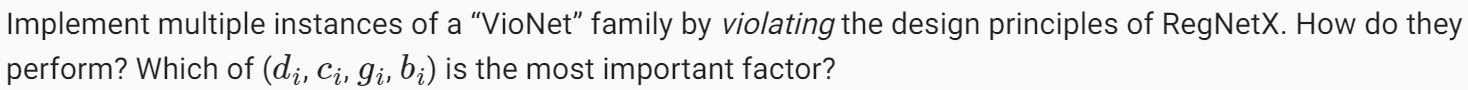

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class VioNetBlock(nn.Module):
    def __init__(self, num_channels, kernel_size=3, use_1x1conv=False, strides=1, skip_connections=True):
        super().__init__()
        self.conv1 = nn.Conv2d(num_channels, num_channels, kernel_size=kernel_size, stride=strides, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=kernel_size, stride=1, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.skip_connections = skip_connections
        if use_1x1conv:
            self.conv1x1 = nn.Conv2d(num_channels, num_channels, kernel_size=1, stride=strides)
        else:
            self.conv1x1 = None

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        if self.skip_connections and self.conv1x1:
            residual = self.conv1x1(x)

        if self.skip_connections:
            return F.relu(out + residual)
        else:
            return F.relu(out)

class VioNet(nn.Module):
    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(VioNet, self).__init__()
        self.net = nn.Sequential(self.stem(stem_channels))
        prev_channels = stem_channels
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(s[0], s[1], s[2], prev_channels))
            prev_channels = s[1]
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(prev_channels, num_classes)))
        self.init_weights()

    def stem(self, num_channels):
        return nn.Sequential(
            nn.Conv2d(3, num_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(num_channels), nn.ReLU())

    def stage(self, depth, num_channels, kernel_size, prev_channels):
        blk = []
        if num_channels != prev_channels:
            blk.append(nn.Conv2d(prev_channels, num_channels, kernel_size=1))
        for i in range(depth):
            blk.append(VioNetBlock(num_channels, kernel_size=kernel_size, use_1x1conv=(i == 0)))
        return nn.Sequential(*blk)

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.net(x)

# Desain beberapa model VioNet dengan pelanggaran yang berbeda
# (depth, num_channels, kernel_size) per stage
vioNet1 = VioNet([(4, 32, 3), (2, 64, 5), (6, 128, 1), (2, 256, 3)], stem_channels=16)
vioNet2 = VioNet([(3, 32, 1), (4, 80, 3), (5, 160, 5), (3, 320, 3)], stem_channels=32)

# Cek model
summary(vioNet1, (3, 224, 224))
summary(vioNet2, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             448
       BatchNorm2d-2         [-1, 16, 112, 112]              32
              ReLU-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             544
            Conv2d-5         [-1, 32, 112, 112]           9,248
       BatchNorm2d-6         [-1, 32, 112, 112]              64
            Conv2d-7         [-1, 32, 112, 112]           9,248
       BatchNorm2d-8         [-1, 32, 112, 112]              64
            Conv2d-9         [-1, 32, 112, 112]           1,056
      VioNetBlock-10         [-1, 32, 112, 112]               0
           Conv2d-11         [-1, 32, 112, 112]           9,248
      BatchNorm2d-12         [-1, 32, 112, 112]              64
           Conv2d-13         [-1, 32, 112, 112]           9,248
      BatchNorm2d-14         [-1, 32, 1

4. Your goal is to design the “perfect” MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

In [ ]:
# 1. Mulai dengan arsitektur dasar:

import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 2. Tambahkan kedalaman dan regularization:

class DeepMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth):
        super(DeepMLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(depth):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.Dropout(p=0.5))  # Regularization
        self.layers.append(nn.Linear(hidden_size, num_classes))

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        return x

# 3. Eksperimen dengan skip connections:

class SkipMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth):
        super(SkipMLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(depth):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.layers.append(nn.Linear(hidden_size, num_classes))

    def forward(self, x):
        skip = x
        for layer in self.layers:
            x = F.relu(layer(x))
        return x + skip  # Skip connection